In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_rows",None)
#pd.set_option("display.max_columns",None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
NData =  pd.read_csv('auto-mpg.csv')

In [3]:
NData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
NData.shape

(398, 9)

In [5]:
NData.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
NData['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

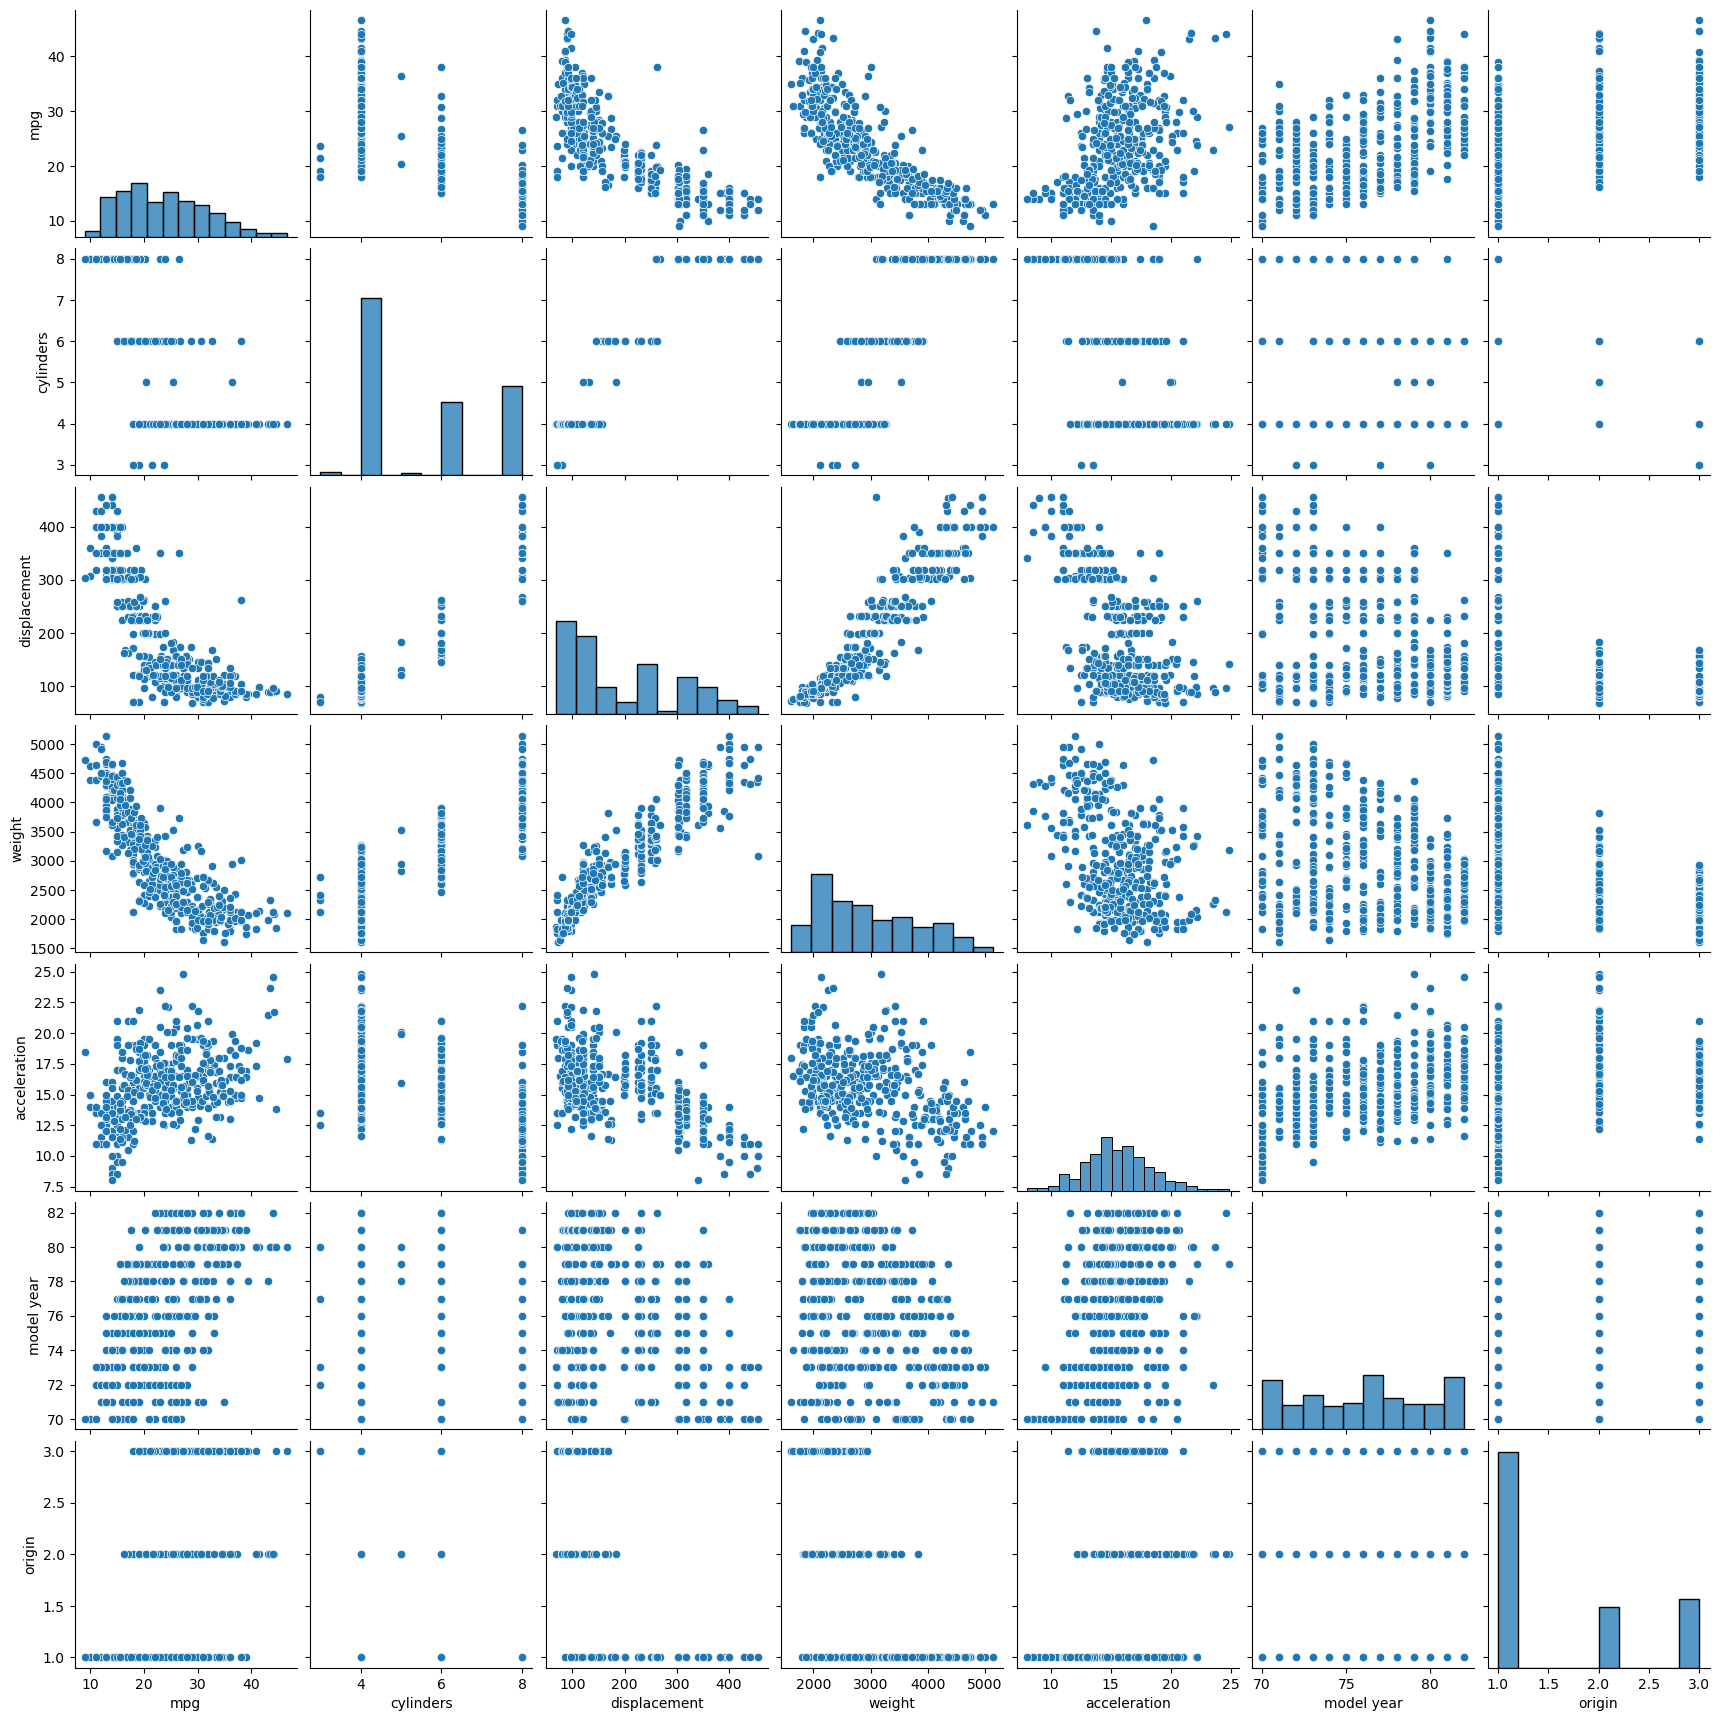

In [7]:
sns.pairplot(NData)

In [8]:
NData.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
NData.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [10]:
me = NData['acceleration'].mean()
me

15.568090452261291

In [11]:
NData['acceleration'] = NData['acceleration'].replace(np.nan,me)

In [12]:
md = NData['acceleration'].median()
md

15.5

In [13]:
mo = NData['acceleration'].mode()
mo[0]

14.5

In [14]:
NData['origin'] = NData['origin'].replace(1,'America')

In [15]:
NData = NData.replace({'origin':{2:'Europe',3:'Asia'}})

In [16]:
NData['origin'].sample(10)

355       Asia
253    America
362       Asia
179     Europe
250    America
35     America
397    America
91     America
344    America
383       Asia
Name: origin, dtype: object

In [17]:
NData = NData.drop(['car name'],axis=1)

In [18]:
NData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [19]:
NData['horsepower'].value_counts(dropna=False)

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [20]:
NData.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [21]:
NData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


<AxesSubplot:xlabel='mpg'>

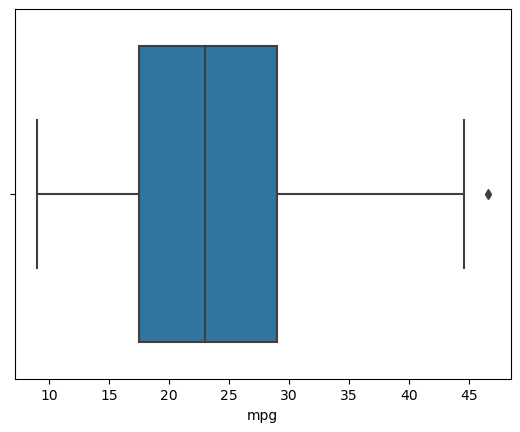

In [22]:
sns.boxplot(NData['mpg'])

In [23]:
def rmv_outlier(col):
    sorted(col)
    q1,q3= col.quantile([0.25,0.75])
    IQR = q3 - q1
    lowrange = q1 - 1.5*IQR
    uprange = q3 + 1.5*IQR
    return lowrange,uprange

In [24]:
lowmpg,upmpg = rmv_outlier(NData['mpg'])
NData['mpg'] = np.where(NData['mpg']>upmpg, upmpg , NData['mpg'])
NData['mpg'] = np.where(NData['mpg']<lowmpg, lowmpg , NData['mpg'])

<AxesSubplot:xlabel='mpg'>

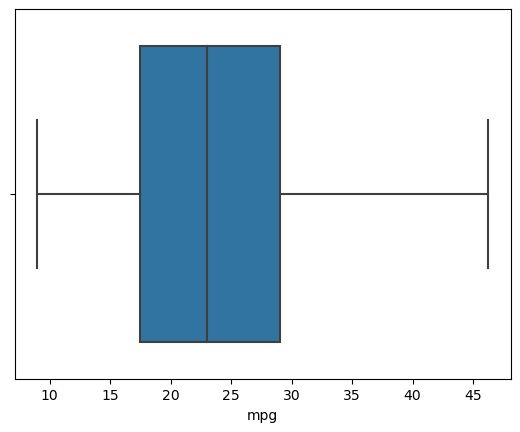

In [25]:
sns.boxplot(NData['mpg'])

In [26]:
NData["origin"]=NData["origin"].replace({'America':1,'Europe':2,'Asia':3})

In [27]:
NData.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
35,17.0,6,250.0,100,3329,15.5,71,1
314,26.4,4,140.0,88,2870,18.1,80,1
272,23.8,4,151.0,85,2855,17.6,78,1
386,25.0,6,181.0,110,2945,16.4,82,1
340,25.8,4,156.0,92,2620,14.4,81,1
310,38.1,4,89.0,60,1968,18.8,80,3
298,23.0,8,350.0,125,3900,17.4,79,1
347,37.0,4,85.0,65,1975,19.4,81,3
102,26.0,4,97.0,46,1950,21.0,73,2
372,27.0,4,151.0,90,2735,18.0,82,1


In [28]:
NData = pd.get_dummies(NData,columns=["origin"])

In [29]:
NData.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
229,16.0,8,400.0,180,4220,11.1,77,1,0,0
43,13.0,8,400.0,170,4746,12.0,71,1,0,0
159,14.0,8,351.0,148,4657,13.5,75,1,0,0
390,32.0,4,144.0,96,2665,13.9,82,0,0,1
37,18.0,6,232.0,100,3288,15.5,71,1,0,0
73,13.0,8,307.0,130,4098,14.0,72,1,0,0
174,18.0,6,171.0,97,2984,14.5,75,1,0,0
231,15.5,8,400.0,190,4325,12.2,77,1,0,0
365,20.2,6,200.0,88,3060,17.1,81,1,0,0
350,34.7,4,105.0,63,2215,14.9,81,1,0,0


In [30]:
hpIsDigit = pd.DataFrame(NData.horsepower.str.isdigit())

In [31]:
NData[hpIsDigit['horsepower'] == False]
#only those rows will be in the output where hp has false value

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [32]:
NData['horsepower'] = NData['horsepower'].replace('?',np.nan)

In [33]:
med=NData['horsepower'].median()
NData['horsepower'] = NData['horsepower'].replace(np.nan,med)

In [34]:
NData['horsepower'].isnull().sum()

0

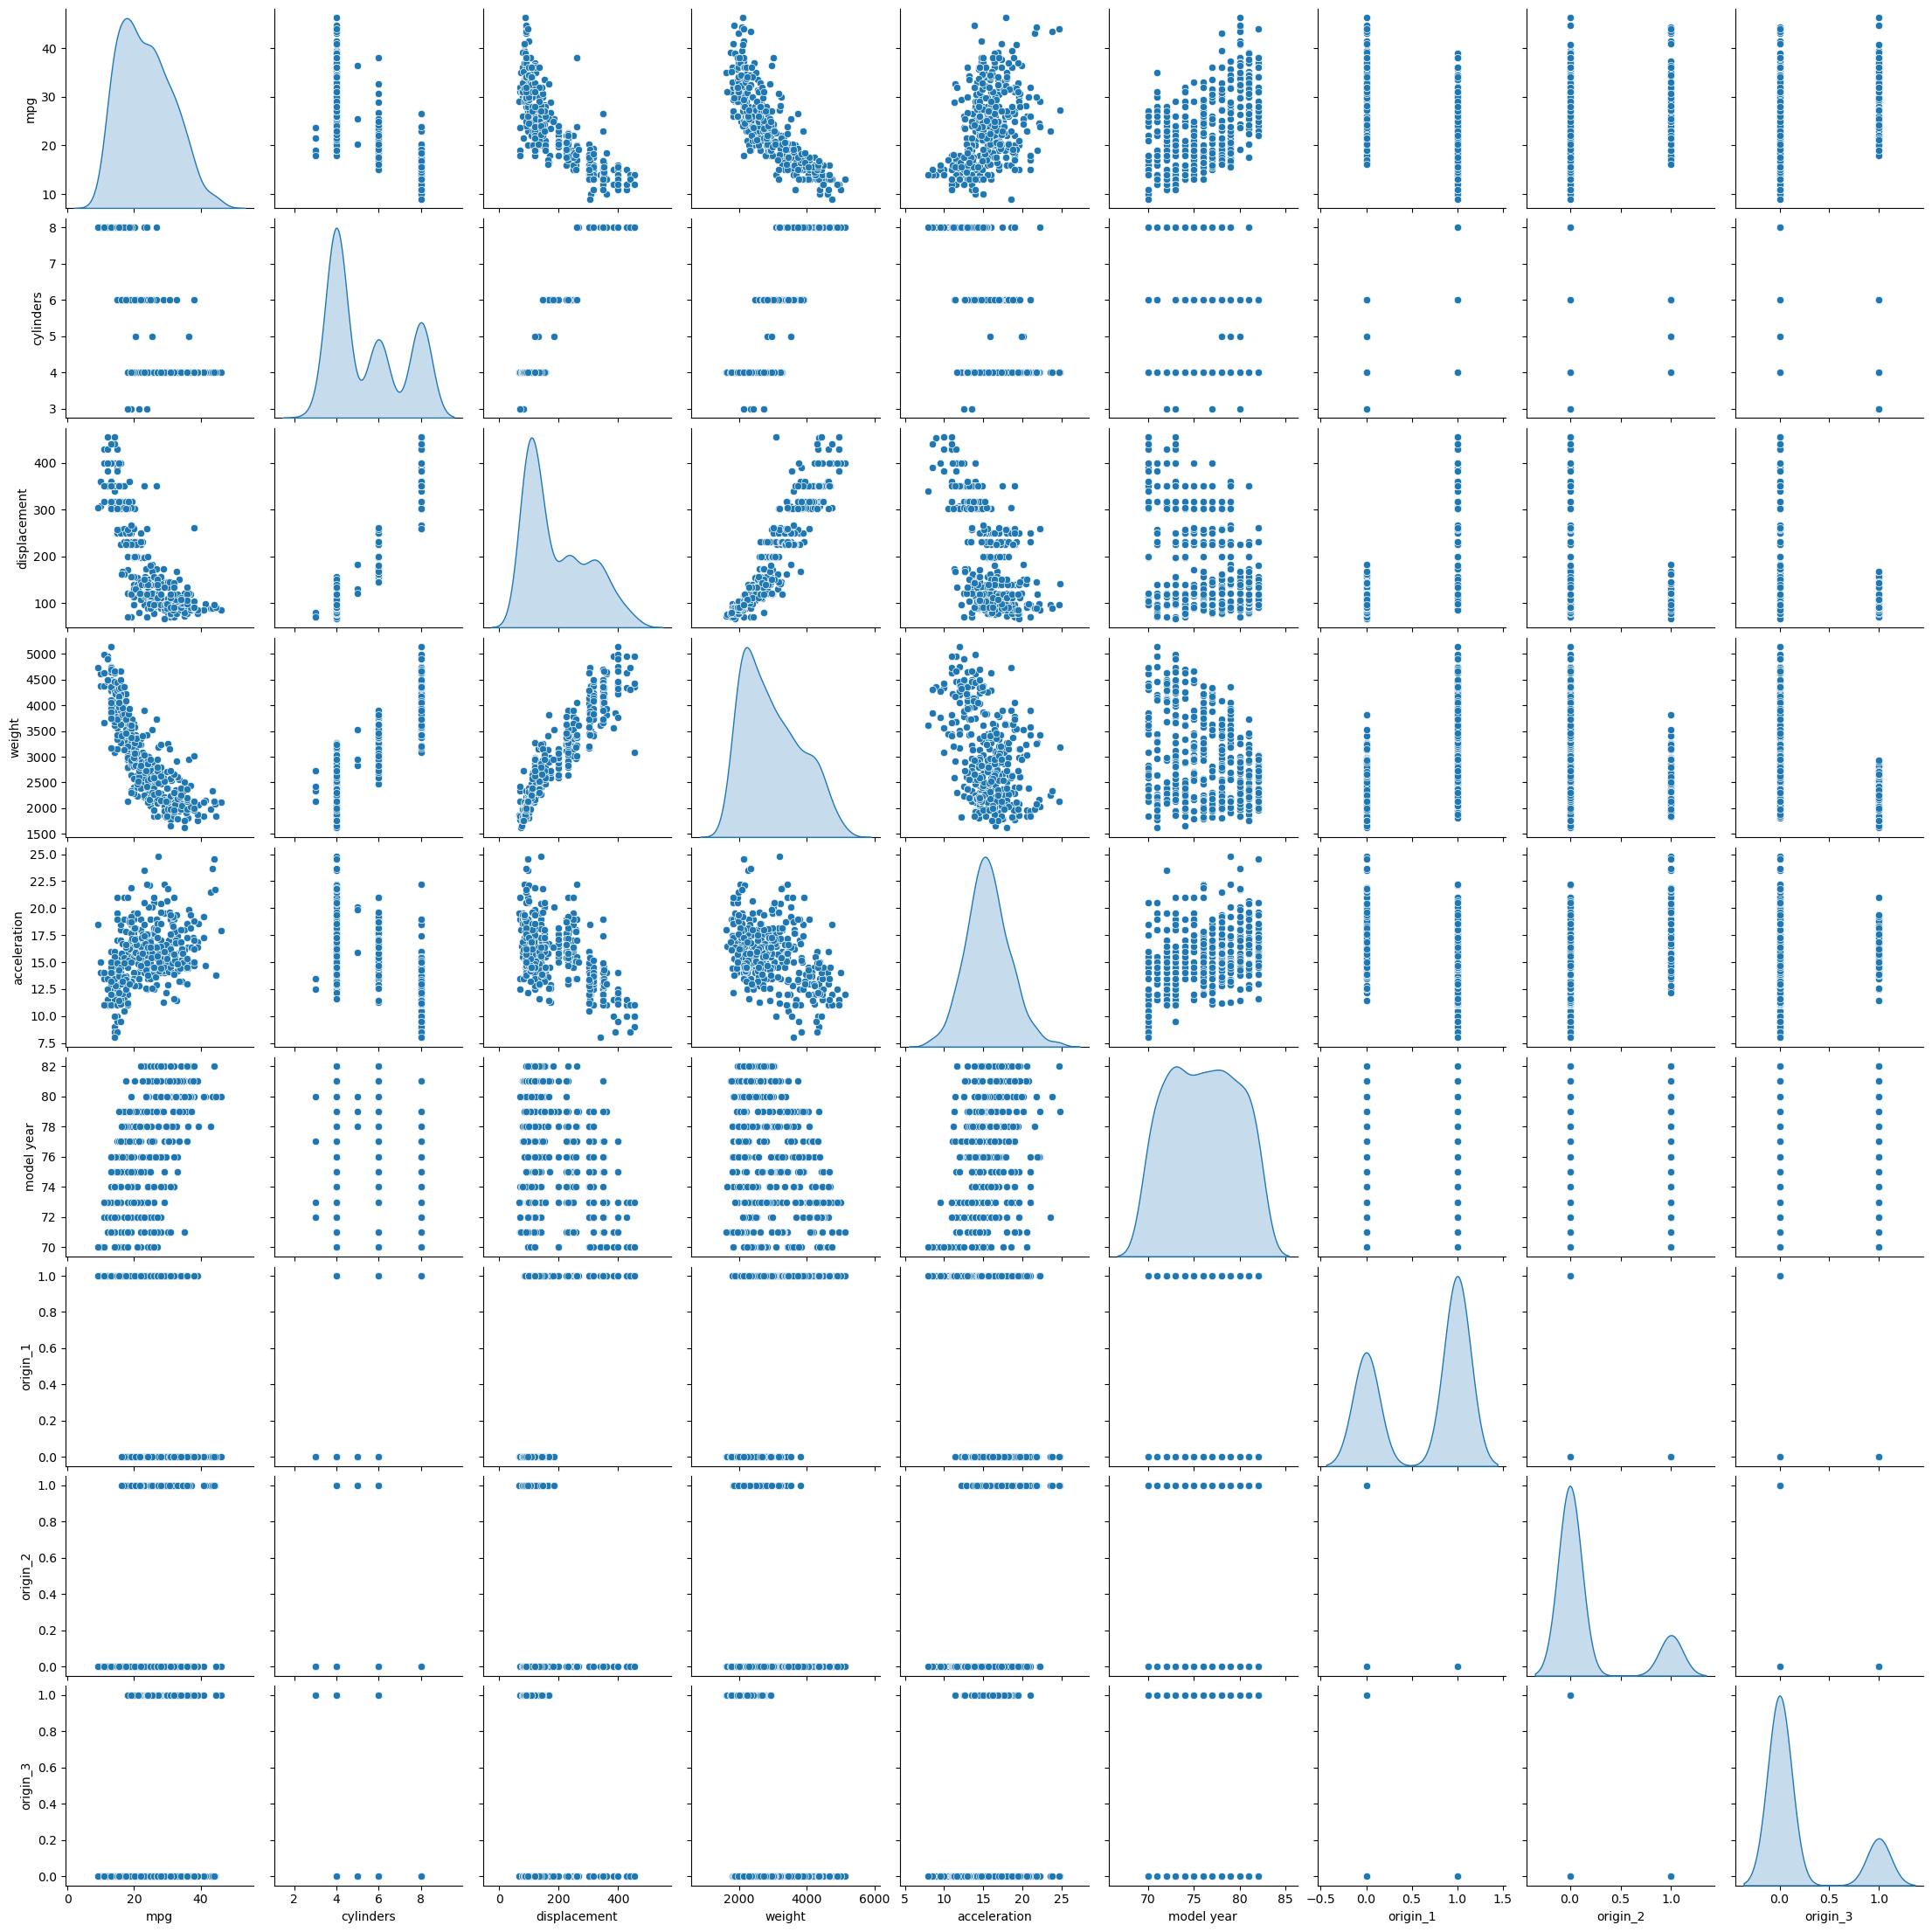

In [35]:
sns.pairplot(NData,diag_kind='kde')

# Building linear model

In [36]:
x=NData.drop(['mpg'],axis=1) #Independent variable
y=NData[['mpg']] #  Dependent Variable

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [38]:
print(x_train)
print(y_train)

     cylinders  displacement horsepower  weight  acceleration  model year  \
350          4         105.0         63    2215          14.9          81   
59           4          97.0         54    2254          23.5          72   
120          4         121.0        112    2868          15.5          73   
12           8         400.0        150    3761           9.5          70   
349          4          91.0         68    1985          16.0          81   
..         ...           ...        ...     ...           ...         ...   
393          4         140.0         86    2790          15.6          82   
255          4         140.0         88    2720          15.4          78   
72           8         304.0        150    3892          12.5          72   
235          4          97.0         75    2265          18.2          77   
37           6         232.0        100    3288          15.5          71   

     origin_1  origin_2  origin_3  
350         1         0         0  
59 

# Fit Linear Model

In [39]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [40]:
model_1.score(x_train,y_train)

0.8144697076181469

In [41]:
model_1.score(x_test,y_test) #out of sample score(R2)

0.8433037313379695

In [42]:
poly=PolynomialFeatures(degree=2,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf=linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)

y_pred = poly_clf.predict(x_test2)
#y_pred

#In sample(training) R^2 will always improve with the number of variables
print(poly_clf.score(x_train2,y_train))

#Out off sample(testing) R^2 is our measure of success and does improve
print(poly_clf.score(x_test2,y_test))

0.8999038290043104
0.861476777915966
